In [540]:
# Canonical way of importing TensorFlow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits= load_digits()

# If this doesn't work TensorFlow is not installed correctly

# Check tf version, oftentimes tensorflow is not backwards compatible
tf.__version__

'1.4.0'

In [541]:
# TensorBoard Graph visualizer in notebook
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [542]:
# Break up data into train and test
from sklearn.model_selection import train_test_split

digits_target = []
for target in digits.target:
    a = np.zeros(10)
    a[target]=1
    digits_target.append(a.tolist())
    
    
# print (digits_target)
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits_target, test_size=0.20, random_state=0)

# x_train = tf.Variable(x_train)
# y_train = tf.Variable(y_train)
# x_test = tf.Variable(x_test)
# y_test = tf.Variable(y_test)

# print(x_train, y_train, x_test, y_test)
# x_train.get_shape().as_list()[0]

In [543]:
tf.reset_default_graph()

In [544]:
# Define input
x = tf.placeholder(tf.float32,shape = [None,64]) 
# None, because we don't specify how many examples we'll look at

W = tf.Variable(tf.zeros([64, 10])) # number of weights
b = tf.Variable(tf.zeros([10])) # number of bias terms

In [545]:
y_hat = tf.nn.softmax(tf.matmul(x, W) + b) 
# define what we'll take the softmax activation on

# Notice order on x and W (dimensions must match)

In [546]:
# correct answers

# y = tf.placeholder(tf.float32, [None, 10])

y = tf.placeholder(tf.float32, [None,10])

In [547]:
# define loss function
# Cross entropy

ce = tf.reduce_mean(-tf.reduce_sum( y* tf.log(y_hat),axis=1))

In [548]:
ce # sum over the columns to get cost for every training example

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [549]:
train_step = tf.train.GradientDescentOptimizer(learning_rate = .001).minimize(ce)

In [550]:
def acc_train(x_train, y_train):
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_hat,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    a = sess.run(accuracy, feed_dict={x: x_train, y: y_train})
#     print(a)
    return a

# monitor accuracy
def acc():
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_hat,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    a = sess.run(accuracy, feed_dict={x: x_test, y: y_test})
#     print(a)
    return a
#     FIX THIS

In [551]:
sess = tf.Session()

In [552]:
sess.run(tf.global_variables_initializer())

In [553]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
#     idx = np.arange(0, data.get_shape().as_list()[0])
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [554]:
accr_train = []
accr = []
epochs = []

for i in range(200):
    # get batches of training data
    # we don't show everything to the network at once
#     batch_xs = x_train.next_batch(100)
#     batch_ys = y_train.next_batch(100)
    batch_xs, batch_ys = next_batch(100, x_train, y_train)
#     print(batch_xs)
    sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys})
    if i%10==0:
#         acc()
        accr_train.append(acc_train(batch_xs, batch_ys))
        accr.append(acc())
        epochs.append(i)
        


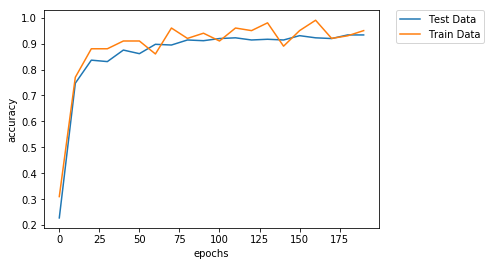

In [555]:
plt.plot(epochs, accr, label="Test Data")
plt.plot(epochs, accr_train, label="Train Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [556]:
acc()

0.93055558

In [557]:
show_graph(tf.get_default_graph()) #not that great, we should probably use scopes